In [19]:
# imporing required libraries
import librosa, librosa.display
import matplotlib.pyplot as plt
import soundfile
import os, glob
import numpy as np

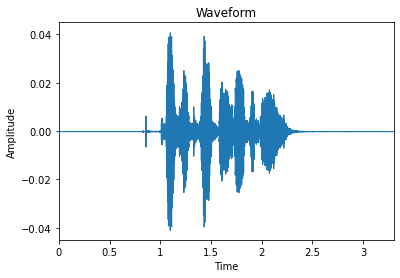

In [20]:
# Learning about different features

path = "./data.wav"
signal, sampleRate = librosa.load(path)

librosa.display.waveplot(signal, sr=sampleRate)
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

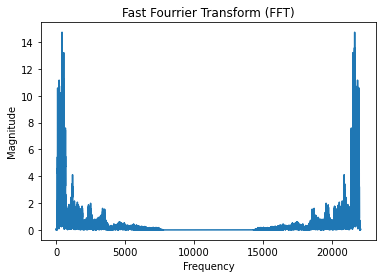

In [21]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sampleRate, len(magnitude))

plt.plot(frequency, magnitude)
plt.title("Fast Fourrier Transform (FFT)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

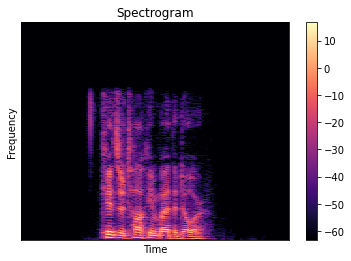

In [22]:
stft = librosa.core.stft(signal, hop_length=512)

spectrogram = np.abs(stft)
logSpectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(logSpectrogram, sr=sampleRate, hop_length=512)

plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

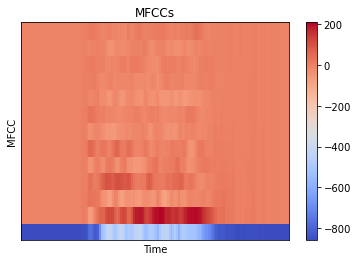

In [23]:
mfccs = librosa.feature.mfcc(signal, n_mfcc=13)

librosa.display.specshow(mfccs, sr=sampleRate, hop_length=512)

plt.title("MFCCs")
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [24]:
#extracting features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
            
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            stft=np.abs(librosa.stft(X))
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [25]:
#emotions present in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'angry', 'disgust', 'surprised']

In [26]:
#loading data with observed_emotions and extracting features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("./data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [27]:
x_train,x_test,y_train,y_test=load_data()

In [28]:
x = np.array([x_train, x_test])
y = np.array([y_train, y_test])

<ipython-input-28-421e9e9c3917>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array([x_train, x_test])
<ipython-input-28-421e9e9c3917>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y = np.array([y_train, y_test])


In [29]:
values, counts = np.unique(y[0], return_counts=True)

In [30]:
counts, values

(array([147, 154, 150, 149, 159, 162]),
 array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'surprised'],
       dtype='<U9'))

Text(0.5, 1.0, 'Frequency Table')

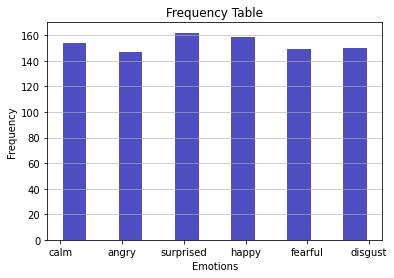

In [31]:
plt.hist(x=y[0], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Frequency Table')